In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import SIMION_utils as su
import importlib
import pandas as pd

In [2]:
base = 'D:/Simulation Data/SIMION/241021/'
files = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8']
ftype = '.csv'

In [3]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'run30000':
        da = np.array([i for i in data.values[38:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[35:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    else:
        da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
        #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 2.9e+5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

In [4]:
Vcage = [0, 0.25, 0.5, 0.75, -0.25, -0.5, -0.75, -5]

In [5]:
effs

[0.2871019933067285,
 0.2699353080165505,
 0.12278573912454911,
 0.00576134734184337,
 0.26370767506148535,
 0.3214928588868502,
 0.29996556469622127,
 0.3111195491047608]

<ErrorbarContainer object of 3 artists>

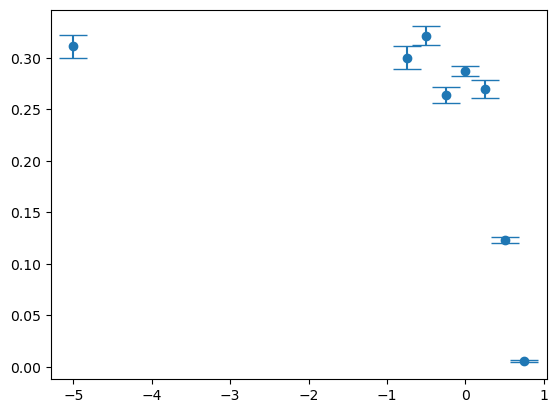

In [6]:
plt.errorbar(Vcage, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')

In [7]:
# Looking at some trajectories

In [8]:
base = 'D:/Simulation Data/SIMION/241022/'
files = ['run0', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7']
ftype = '.csv'

In [9]:
times = []
xs= []
ys = []
zs = []
for file in files: 
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij'))
    time = np.transpose(data.values[27:-1, 1:2])[0].astype('float')
    x = np.transpose(data.values[27:-1, 2:3])[0].astype('float')
    y = np.transpose(data.values[27:-1, 3:4])[0].astype('float')
    z = np.transpose(data.values[27:-1, 4:5])[0].astype('float')
    times.append(time)
    xs.append(x)
    ys.append(y)
    zs.append(z)

C:\Users\thoma\AppData\Local\Temp\ipykernel_16048\3957206763.py:7: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_16048\3957206763.py:7: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_16048\3957206763.py:7: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_16048\3957206763.py:7: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))
C:\Users\thoma\AppData\Local\Temp\ipykernel_16048\3957206763.py:

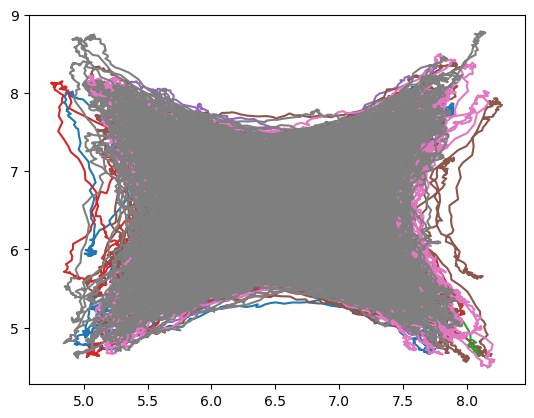

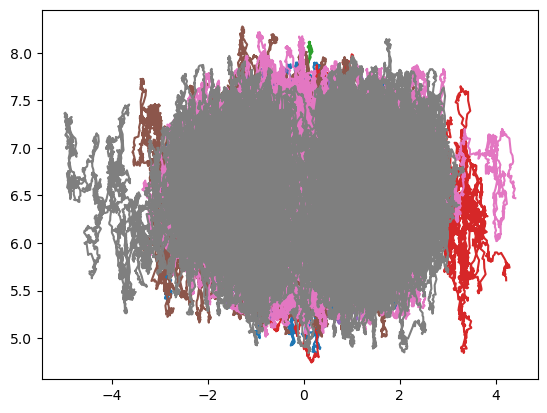

In [10]:
for i in range(len(files)):
    plt.plot(xs[i], ys[i])
plt.figure()
for i in range(len(files)):
    plt.plot(zs[i], xs[i])

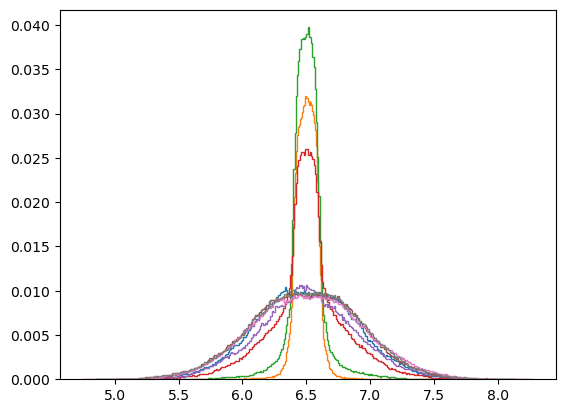

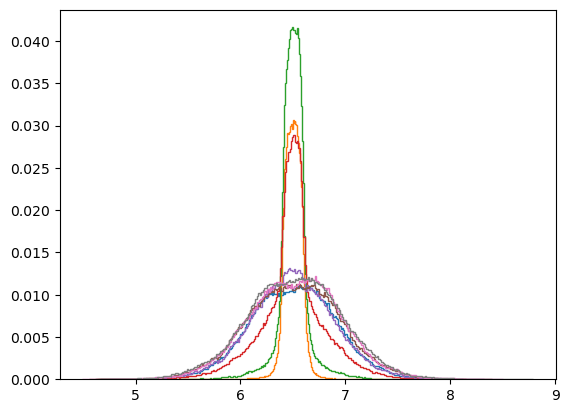

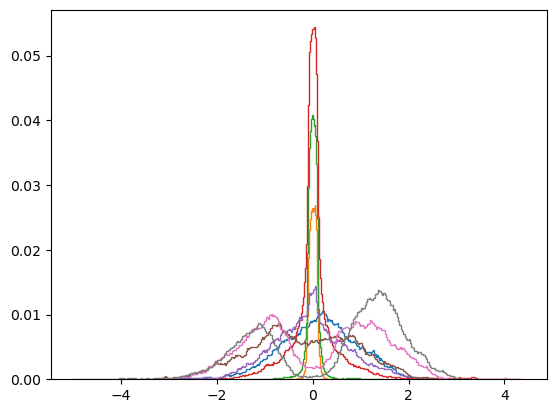

In [11]:
plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(xs[i], bins = 300)
    plt.stairs(counts/sum(counts), bins)

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(ys[i], bins = 300)
    plt.stairs(counts/sum(counts), bins)

plt.figure()
for i in range(len(files)):
    counts, bins = np.histogram(zs[i], bins = 300)
    plt.stairs(counts/sum(counts), bins)

In [12]:
# So V = 0.75V for the shell voltage isn't perfect but it looks like the best so let's just use that as an approximate
# Shame it has a shit efficiency

In [28]:
# First let's mess around with charge to make sure that's actually effecting things.

base = 'D:/Simulation Data/SIMION/241024/'
files = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']#, 'run6', 'run7']
ftype = '.csv'

charge = [1000, 100, 10, 1000, 100, 10]

In [29]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
    #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 2.9e+5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

First 3 1 Torr
Second 3 15 Torr
150 V, 200 kHz, shell at 0.75 V, 0 offset, only DC on rings, 17 V and 8V on rings
Radon in cylinder from edge of Paul trap

<ErrorbarContainer object of 3 artists>

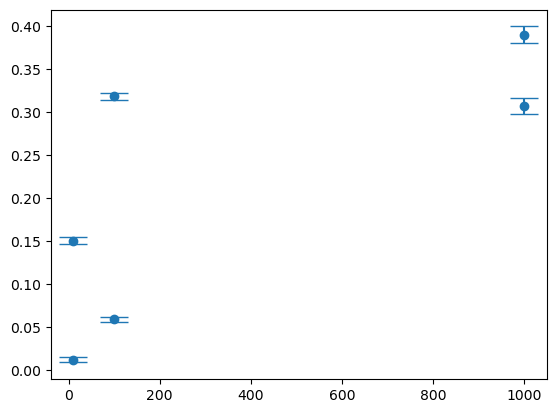

In [30]:
plt.errorbar(charge, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')

In [31]:
effs

[0.3903183261183259,
 0.3187321428571428,
 0.1507373015873016,
 0.307006746031746,
 0.058896356421356405,
 0.01202088744588745]

15 Torr, 200 kHz, shell at 0.75 V, 0 offset, only DC on rings, 17 V and 8V on rings
Radon in cylinder from edge of Paul trap

In [43]:
# First let's mess around with charge to make sure that's actually effecting things.

base = 'D:/Simulation Data/SIMION/241024/'
files = ['run7', 'run8', 'run9', 'run10', 'run11', 'run12', 'run13']
ftype = '.csv'

V = [170, 150, 130, 110, 90, 160, 140]#, 70]

In [44]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
    #da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<1 and k[1] < 2.9e+5:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

<ErrorbarContainer object of 3 artists>

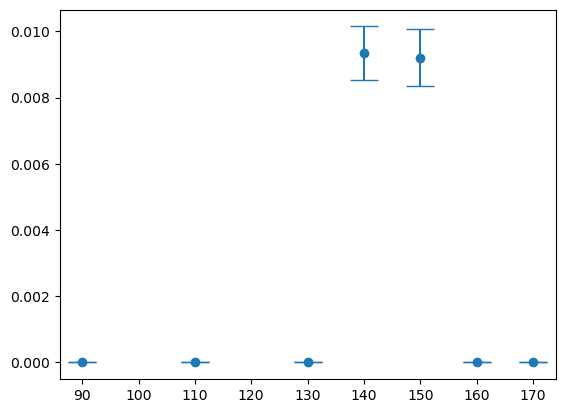

In [45]:
plt.errorbar(V, effs, yerr = errs, linestyle = 'none', capsize = 10, marker = 'o')